# Authentica: A Fake News Predictor Website

Authentica is a project template that is encompassed in two terms: a library for python and Jupyter notebook module. It has the task of detecting and combating fake news, such that the template will use advance technologies in the basis of using natural language processing or NLP in addition of machine, learning, and usage of data analysis to result citations, possible source, and what is the real value of the data that it tries to inherit specially if it is a form of sentiment that may have been a cause of fake news. 

# CM3060 Natural Language Processing

This project is based on the CM3060 Natural Language processing project Idea title: Fake news detection. Their aim is to differentiate misinformation from real factual ones, and to mitigate the use of false information online that may consist of hoaxes, bad conjectures and exaggeration that has no bases of claims. 

# Dataset

Dataset is from Kaggle from a competition called "Fake News - Build a system to identify unreliable news articles" that was run by UTK Machine Learning Club. The link is https://www.kaggle.com/competitions/fake-news/data and the dataset used is "train.csv"

# Libraries

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Identifying news 

In [142]:
# Read the data.csv file
df_data = pd.read_csv("data.csv")

In [143]:
df_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Clean columns and convert values to FAKE or REAL

In [144]:
# Drop 'author' and 'id' columns
df_data_clean = df_data.drop(["author", "id"], axis=1)

# Drop rows with any NaN values in any column
df_data_clean = df_data_clean.dropna(how='any')

# Label as FAKE or REAL
df_data_clean['label'] = df_data_clean['label'].replace({0: 'FAKE', 1: 'REAL'})

# Separate dataset of FAKE and REAL
df_fake = df_data_clean[df_data_clean['label'] == 'FAKE']
df_true = df_data_clean[df_data_clean['label'] == 'REAL']

# Combine fake and true DataFrames
df_clean = pd.concat([df_fake, df_true])

# Remove missing values

In [145]:
# Read the clean_news.csv file
df_clean = pd.read_csv("news.csv")


# Remove rows with missing values
df_clean = df_clean.dropna()
# Check for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [146]:
df_true.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,REAL
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",REAL
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,REAL
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,REAL
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,Ever wonder how Britain’s most iconic pop pian...,REAL


In [147]:
df_fake.head()

,title,text,label
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,FAKE
5,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi...",FAKE
7,Benoît Hamon Wins French Socialist Party’s Pre...,"PARIS — France chose an idealistic, traditi...",FAKE
8,Excerpts From a Draft Script for Donald Trump’...,Donald J. Trump is scheduled to make a highly ...,FAKE
9,"A Back-Channel Plan for Ukraine and Russia, Co...",A week before Michael T. Flynn resigned as nat...,FAKE


# Finalizing Proper Dataset

In [148]:
df = df_clean.sample(frac = 1)
print(df)

      Unnamed: 0                                              title  \
3943        6799  13 Year Old Girl’s Rousing Speech: “If Donald ...   
5795       10022  Private Equity Consultant Hamilton Lane Trots ...   
2464        3637    Rieder: Charlie Hebdo goes on, and that matters   
5986        1841                              Behind the Biden hype   
6085        5390  OpEds | Eric Zuesse: 34 Reasons This Bernie Vo...   
...          ...                                                ...   
3441       10288  ECB policymakers tout December stimulus extension   
5093        6747  Joel Skousen on Scenario World War 3 NWO 2016 ...   
6049        8792  For People Who Are Worried About Druckenmiller...   
3756        4785  As Clinton builds on a strong debate, Trump lo...   
1892        5291  ‘That’s the CRAP young people pay attention to...   

                                                   text label  
3943  Who can argue with this young lady’s speech?\n...  FAKE  
5795  by Yves Smith

# Exploratory Data Analysis

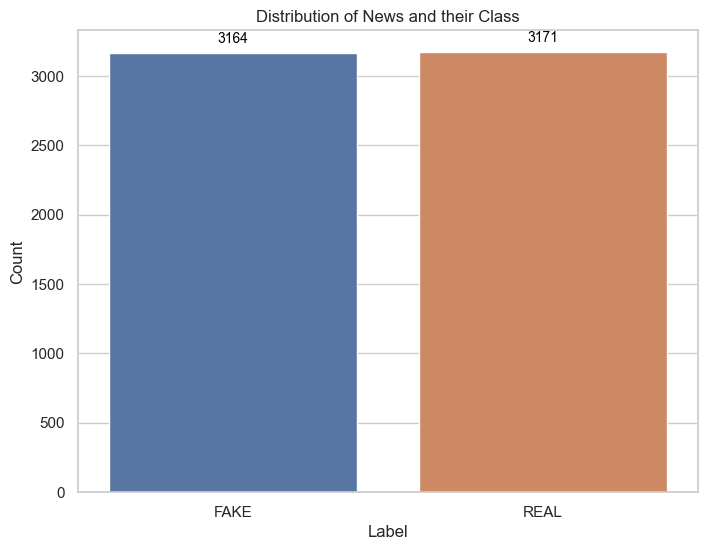

In [149]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(x='label', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10,
                color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of News and their Class")

# Show the plot
plt.show()

Showcases a simple bar graph to visualize the count of Real and Fake news in the dataset

# Text Processing using NLTK

In [150]:
text = df["text"] 

def text_process(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

text_cor = df["text"].apply(text_process)


# Load clean_csv into a DataFrame
clean_df = pd.read_csv("news.csv")

# Apply text_process to the "text" column of clean_df
clean_df["text"] = clean_df["text"].apply(text_process)

This code is used for preprocessing text-data and removing non-alphabetic characters.

In [151]:
text_cor

3943    who can argue with this young lady s speech  i...
5795    by yves smith  private equity shills are ready...
2464    charlie hebdo will not go away  and in the wak...
5986    on this day in   j  fred buzhardt  a lawyer de...
6085     why i won t vote for hillary clinton   evan e...
                              ...                        
3441    ecb policymakers tout december stimulus extens...
5093    source add to the conversation using facebook ...
6049     views november    gold   kwn king world news ...
3756    hillary clinton moved to capitalize tuesday on...
1892     that s the crap young people pay attention to...
Name: text, Length: 6335, dtype: object

This is the list of all values in the dataset with a much simplier text. 

# Dependent and Independent Variables

In [152]:
x = df["text"]
y = df["label"]

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Classification Algorithms and Features  

## Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9122474747474747

In [156]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       781
        REAL       0.93      0.90      0.91       803

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



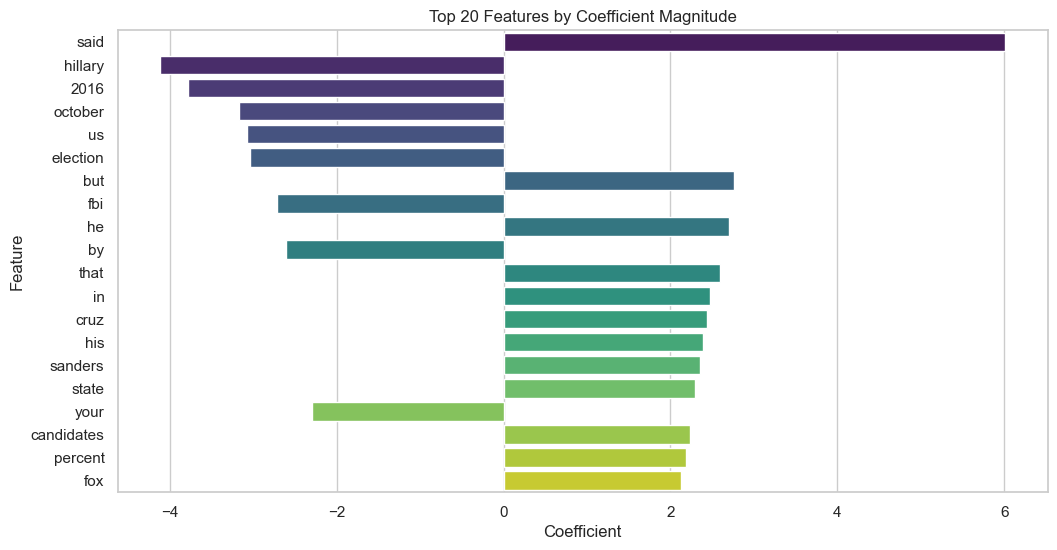

In [157]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

# Get coefficients (feature importances) from the model
coef = LR.coef_[0]
feature_names = vectorization.get_feature_names_out()

# Create a DataFrame to store feature names and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})

# Sort the coefficients by magnitude (absolute value)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the top N features by coefficient magnitude
N = 20
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(N), palette='viridis')
plt.title(f'Top {N} Features by Coefficient Magnitude')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


We can see that the featire that the term "said" is what makes the Logistic regression have its decision to predict if it is real. On the contrary, Hillary and 2016, us,october, eletion etc. are wha makes it define as a fake news

## Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.797979797979798

In [159]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        FAKE       0.79      0.80      0.80       781
        REAL       0.80      0.80      0.80       803

    accuracy                           0.80      1584
   macro avg       0.80      0.80      0.80      1584
weighted avg       0.80      0.80      0.80      1584



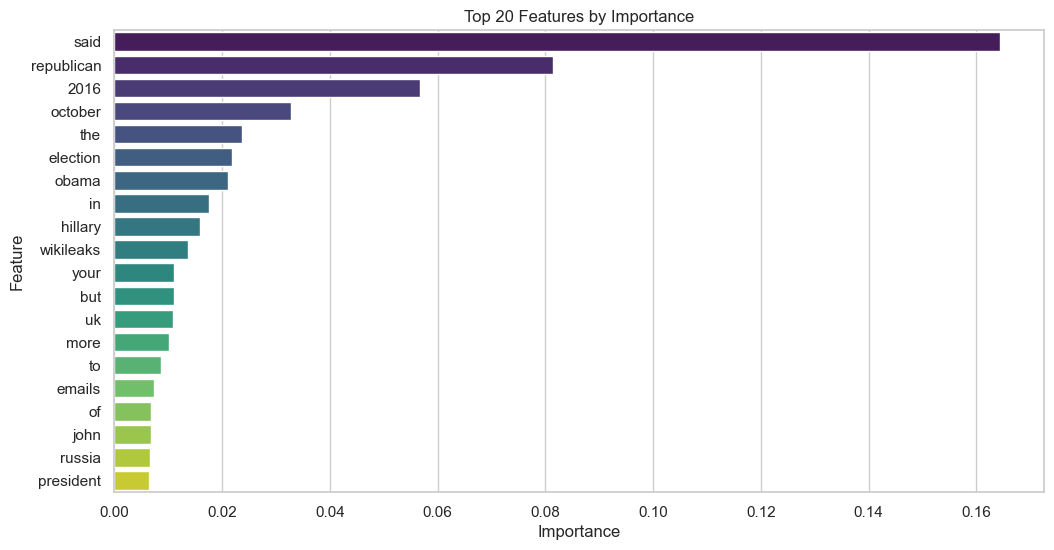

In [160]:
# Get feature importances from the model
importances = DT.feature_importances_
feature_names = vectorization.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N features by importance
N = 20
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(N), palette='viridis')
plt.title(f'Top {N} Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Similar to the linear regression, said has the most valid importance. But the word republican is not seen in the logistic regression's coeffecients

## Random Forest Classifier


In [161]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)


0.8907828282828283

In [162]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.89       781
        REAL       0.90      0.88      0.89       803

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



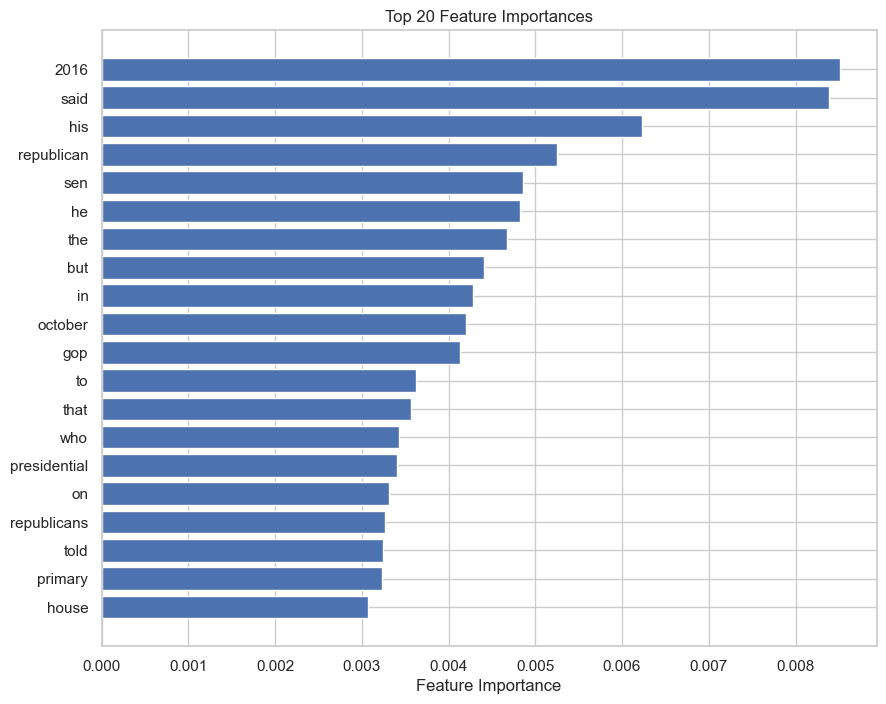

In [163]:
# Visualize feature importance for Random Forest Classifier
feature_importance = RFC.feature_importances_
feature_names = vectorization.get_feature_names_out()
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(20), feature_importance[sorted_idx][-20:], align="center")
plt.yticks(range(20), [feature_names[i] for i in sorted_idx][-20:])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()


As much, the Random Forest has the word sen and gop as it is important for it - which is different that the previous models.

# Pipeline

In [164]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
   ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [165]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [166]:
pred=pipeline.predict(x_test)

In [167]:
df33=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df33.head(10)

,Actual,Predicted
2400,FAKE,FAKE
2537,FAKE,FAKE
3381,FAKE,FAKE
1092,REAL,REAL
1376,FAKE,FAKE
220,FAKE,REAL
619,REAL,REAL
1421,FAKE,FAKE
3358,FAKE,FAKE
2775,REAL,REAL


In [168]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Assuming 'y_test' is the true labels and 'pred' is the predicted labels
# Print the classification report
report = classification_report(y_test, pred)

# Print the accuracy score
accuracy = accuracy_score(y_test, pred)
print('The Accuracy Score Is:', round(accuracy, 2))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, pred, average='weighted')

print('F1-score:', f1_score)
print('Recall:', recall)
print('Precision:', precision)


The Accuracy Score Is: 0.79
F1-score: 0.7818733153638814
Recall: 0.7904040404040404
Precision: 0.8391287257368555


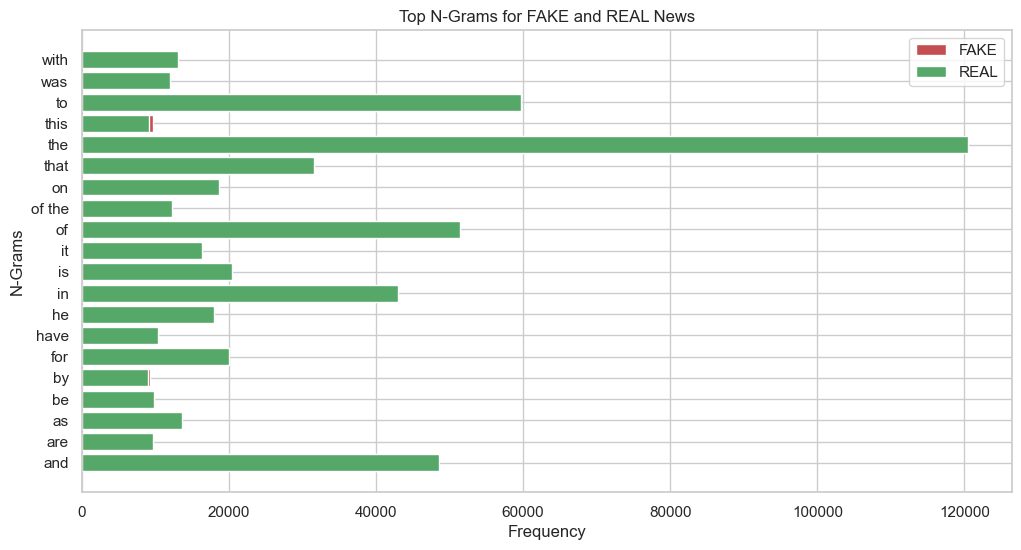

In [169]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for N-Grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=20)
ngram_vectorizer.fit(x_train)

# Transform the data
x_train_ngram = ngram_vectorizer.transform(x_train)

# Get feature names (n-grams)
ngram_feature_names = ngram_vectorizer.get_feature_names_out()

# Visualize top N-Grams for each class
fake_ngram_counts = x_train_ngram[y_train == 'FAKE'].sum(axis=0).A1
real_ngram_counts = x_train_ngram[y_train == 'REAL'].sum(axis=0).A1

plt.figure(figsize=(12, 6))
plt.barh(range(len(ngram_feature_names)), fake_ngram_counts, align="center", color='r', label='FAKE')
plt.barh(range(len(ngram_feature_names)), real_ngram_counts, align="center", color='g', label='REAL')
plt.yticks(range(len(ngram_feature_names)), ngram_feature_names)
plt.xlabel("Frequency")
plt.ylabel("N-Grams")
plt.title("Top N-Grams for FAKE and REAL News")
plt.legend()
plt.show()


# Confusion Matrix of all Models

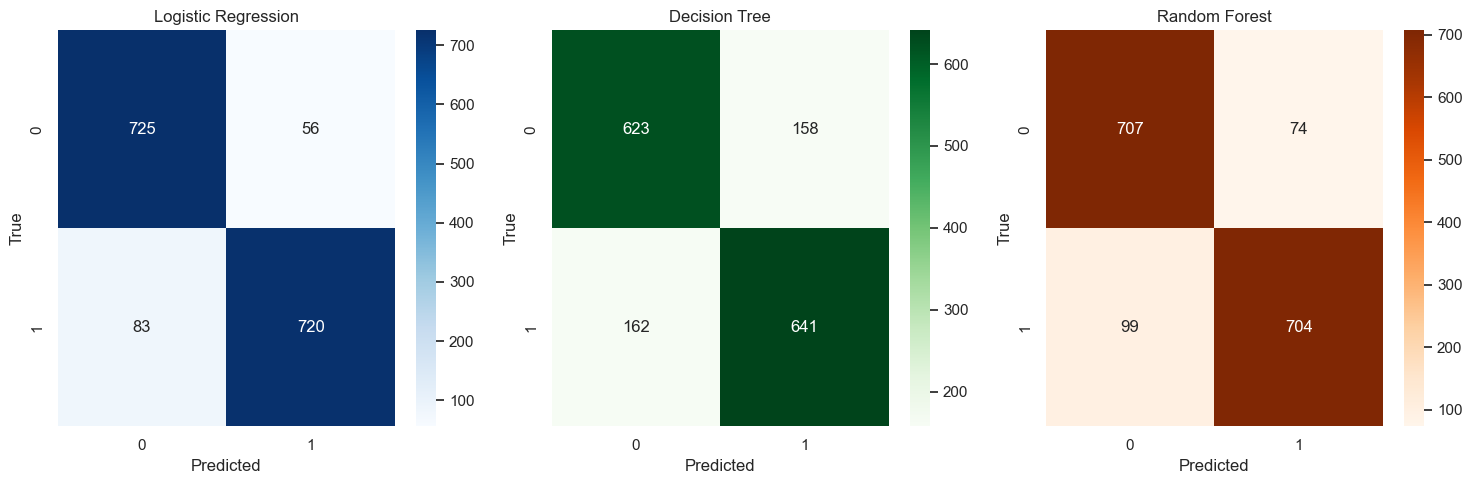

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dt = confusion_matrix(y_test, pred_dt)
cm_rfc = confusion_matrix(y_test, pred_rfc)

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Logistic Regression confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Plot Decision Tree confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

# Plot Random Forest confusion matrix
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")

plt.tight_layout()
plt.show()


In [ ]:
print(cm_lr)

We can see that the confusion matrix across all existing models where Logistic Regression has the highest true prediction while Decision Tree has the poorest result. 

# Model Prediction -  Simulation

# Real News Samples for Simulation

U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.

A Czech stockbroker who saved more than 650 Jewish children from Nazi Germany has died at the age of 106.

NEW YORK -- Bye bye June rate hike. That was the billboard-sizeÂ headline from Wall Street trading desks after the U.S. job-creation machine hit the wall in May. The government said 38,000 jobs were created in May, way, way, wayÂ Â below the roughly 160,000 new positions Wall Street economists had been expecting.

# Fake News Samples  for Simulation

Randy Maugans & Jeffrey Sewell | Metabiology face to face with Artificial Intelligence Published on Sep 20, 2016 We are speaking on a subject that is vital for humanity to comprehend, AI or artificial intelligence, our objective is to further disclose how this is influencing humanity in subtle and not so subtle ways, for without knowledge of its existence or comprehension of its prevalence humanity is easily being led into more sophisticated technological control mechanisms. 

FBI Director James Comey informed members of Congress this morning that he was expanding his investigation into e-mails, based on materials found on the laptop of disgraced former Congressman Anthony Weiner. 

Republican presidential front-runner Donald Trump has a new attack line against Hillary Clinton: "She has caused death."

### Please press 'Enter' after inputting a news

In [201]:
import webbrowser

# Get user input
user_input = input("Enter the news text: ")

# Preprocess the input text
cleaned_input = text_process(user_input)
# Vectorize the cleaned input using the same vectorization used in training
vectorized_input = vectorization.transform([cleaned_input])

# Make predictions using each model
pred_lr = LR.predict(vectorized_input)
pred_dt = DT.predict(vectorized_input)
pred_rfc = RFC.predict(vectorized_input)

# Print predictions from each model
print("\nLogistic Regression Prediction:", pred_lr[0])
print("Decision Tree Prediction:", pred_dt[0])
print("Random Forest Prediction:", pred_rfc[0])

Enter the news text: 100,000 people have come to recent Bernie Sanders rallies. How does he do it?

Logistic Regression Prediction: REAL
Decision Tree Prediction: REAL
Random Forest Prediction: FAKE


# Run this to search it online

In [202]:
def search_online(query):
    search_url = f"https://www.google.com/search?q={query}"
    webbrowser.open_new_tab(search_url)

search_online(cleaned_input)
